In [ ]:
import yaml
from dnn_models import SincNet, MLP

with open('./sincnet_models/sincnet_timit/sincnet_config.yaml') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

# Converting context and shift in samples
CNN_config = config["CNN"]
window_len = int(CNN_config["fs"] * CNN_config["convolution_window_len"] / 1000.0)
CNN_config.update({"input_dim": window_len})
CNN_net = SincNet(CNN_config)

DNN1_config = config["DNN_1"]
DNN1_config.update({"input_dim": CNN_net.out_dim})
DNN1_net = MLP(DNN1_config)

Load state dict

In [ ]:
import torch

cnn_state_dict = torch.load('./sincnet_models/sincnet_timit/train/cnn_state_dict.pth')
dnn1_state_dict = torch.load('./sincnet_models/sincnet_timit/train/dnn1_state_dict.pth')

CNN_net.load_state_dict(cnn_state_dict)
DNN1_net.load_state_dict(dnn1_state_dict)

In [36]:
import numpy as np

vectors = np.load('./d_vect_timit.npy', allow_pickle=True)

vectors = vectors.item()

embeded_vectors = []
for key, value in vectors.items():
    embeded_vectors.append({key: value})

In [32]:
embeded_vectors

[{'fm1.wav': array([-0.00242155, -0.00584291,  0.09138998, ..., -0.00130925,
          0.01796809, -0.00927274], dtype=float32)},
 {'fm2.wav': array([-0.0017613 , -0.00590722,  0.08687639, ..., -0.00117629,
          0.02364391, -0.00673145], dtype=float32)},
 {'m1.wav': array([-0.00305923, -0.00855766,  0.12729688, ..., -0.00131667,
         -0.00321238, -0.00883587], dtype=float32)},
 {'m2.wav': array([-0.00325095, -0.00782005,  0.07845866, ..., -0.00116909,
          0.02735781, -0.00217418], dtype=float32)}]

From speaker separation

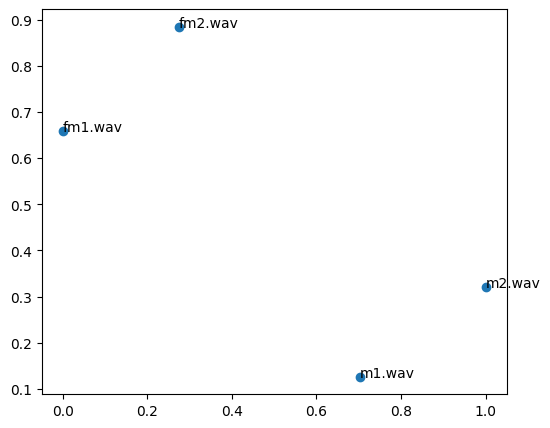

In [35]:
# TSNE plot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X = np.array([list(v.values())[0] for v in embeded_vectors])
X_embedded = TSNE(n_components=2, random_state=0, perplexity=2).fit_transform(X)
X_embedded = (X_embedded - X_embedded.min()) / (X_embedded.max() - X_embedded.min())
plt.figure(figsize=(6, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# label points with the keys
for i, txt in enumerate(embeded_vectors):
    plt.annotate(list(txt.keys())[0], (X_embedded[i, 0], X_embedded[i, 1]))

plt.show()

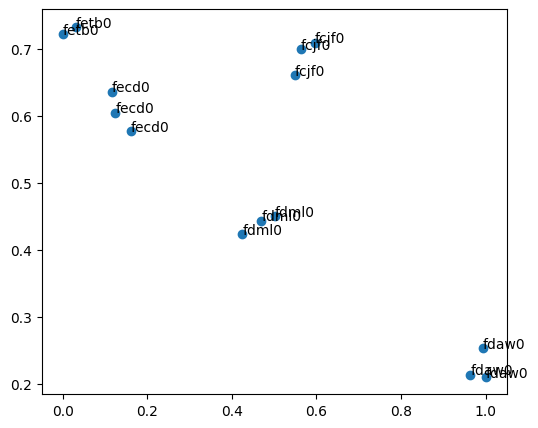

In [40]:
# TSNE plot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X = np.array([list(v.values())[0] for v in embeded_vectors])
X_embedded = TSNE(n_components=2, random_state=0, perplexity=2).fit_transform(X)
X_embedded = (X_embedded - X_embedded.min()) / (X_embedded.max() - X_embedded.min())
plt.figure(figsize=(6, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# label points with the keys
for i, txt in enumerate(embeded_vectors):
    key = list(txt.keys())[0]
    key = key.split('/')[0]
    plt.annotate(key, (X_embedded[i, 0], X_embedded[i, 1]))

plt.show()

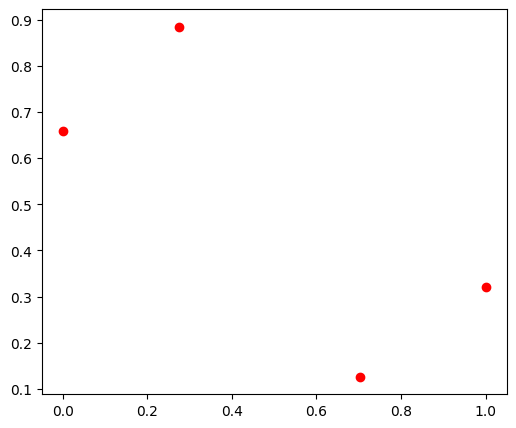

In [30]:
# TSNE plot
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, perplexity=2)

vector_array = np.array(embeded_vectors)

X_2d = tsne.fit_transform(vector_array)
# normalize the array to be between 0 and 1
X_2d = (X_2d - X_2d.min()) / (X_2d.max() - X_2d.min())

plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='r')
plt.show()





In [1]:
from pathlib import Path
import os

path_to_speaker = Path("./dataset/speaker_count/1/train").glob('**/*.wav')
dest_path = "./dataset/speaker_count/1"

for path in path_to_speaker:
    print(path)
    os.system(f"cp {path} {dest_path}")





dataset/speaker_count/1/train/dr7/fpac0/si1921.wav
dataset/speaker_count/1/train/dr7/fpac0/sx301.wav
dataset/speaker_count/1/train/dr7/fpac0/sx211.wav
dataset/speaker_count/1/train/dr7/fpac0/sx31.wav
dataset/speaker_count/1/train/dr7/fpac0/si661.wav
dataset/speaker_count/1/train/dr7/fpac0/si2011.wav
dataset/speaker_count/1/train/dr7/fpac0/sx121.wav
dataset/speaker_count/1/train/dr7/fpac0/sx391.wav
dataset/speaker_count/1/train/dr7/mntw0/sx348.wav
dataset/speaker_count/1/train/dr7/mntw0/si1698.wav
dataset/speaker_count/1/train/dr7/mntw0/sx168.wav
dataset/speaker_count/1/train/dr7/mntw0/si1068.wav
dataset/speaker_count/1/train/dr7/mntw0/si2328.wav
dataset/speaker_count/1/train/dr7/mntw0/sx258.wav
dataset/speaker_count/1/train/dr7/mntw0/sx202.wav
dataset/speaker_count/1/train/dr7/mntw0/sx78.wav
dataset/speaker_count/1/train/dr7/maeo0/sx246.wav
dataset/speaker_count/1/train/dr7/maeo0/si1326.wav
dataset/speaker_count/1/train/dr7/maeo0/sx156.wav
dataset/speaker_count/1/train/dr7/maeo0/si1956

In [3]:
path_to_wav = "./dataset/speaker_count/1"

import os
from pathlib import Path
import librosa
import soundfile as sf
from tqdm import tqdm

# Convert all the wav files to mp3
path_to_wav = Path(path_to_wav).glob('*.wav.mp3')

for path in tqdm(path_to_wav):
    # audio, _ = librosa.load(path, sr=16000)
    # sf.write(f"{path}.mp3", audio, 16000)
    # os.remove(path)
    # Remove .wav from the name
    os.rename(path, str(path).replace('.wav', ''))
    # os.rename(path, path.with_suffix('.mp3'))

1714it [00:00, 18606.28it/s]


In [17]:
# Reformat metadata
import json
from pathlib import Path
import librosa

meta = []
path_to_mp3 = "./dataset/speaker_count/"
path = Path(path_to_mp3).glob('*')

for p in path:
    # mp3_paths = [str(path) for path in p.glob('*.mp3')][:2000]
    mp3_paths = [path for path in p.glob('*.mp3')][:1000]
    for mp3 in mp3_paths:
        # librosa.get_duration(filename=mp3)
        meta.append({"num_speaker": str(p.stem), "path": str(mp3)})

with open("./dataset/speaker_count/metadata_train.json", "w") as f:
    json.dump(meta, f, indent=4)

In [2]:
import torch

state_dict = torch.load("./sincnet_models/SincNet_TIMIT_original/model_raw.pkl")

cnn_state_dict = state_dict["CNN_model_par"]
dnn1_state_dict = state_dict["DNN1_model_par"]
dnn2_state_dict = state_dict["DNN2_model_par"]

# Save the state_dict
torch.save(cnn_state_dict, "./models/speaker_classifcation/sincnet/cnn_state_dict.pth")
torch.save(dnn1_state_dict, "./models/speaker_classifcation/sincnet/dnn1_state_dict.pth")
torch.save(dnn2_state_dict, "./models/speaker_classifcation/sincnet/dnn2_state_dict.pth")

In [13]:
import torch

loss = torch.nn.CrossEntropyLoss()

y_hat = torch.tensor([
    [2.5, 0.3, -1.2, 3.1, -0.5, 0.0, -2.1, 1.2, 0.7, -0.8],
    [0.1, 2.4, -0.5, 1.3, -0.2, 1.8, 0.0, -1.0, 0.4, 0.5],
    [-0.3, 0.2, 2.1, -1.2, 4.0, -0.9, 1.1, 2.5, -2.3, 0.8],
    [1.5, -0.7, 2.2, 0.0, 1.1, -1.5, 3.3, -0.4, 2.0, 1.7]
])
y = torch.tensor([3, 1, 4, 9])

output = loss(y_hat, y)
output

tensor(1.0979)